In [ ]:
#Importa la librería drive de Google Colab para montar la unidad de Google Drive.
from google.colab import drive
#Monta la unidad de Google Drive en el directorio /content/drive.
drive.mount('/content/drive')

Mounted at /content/drive


## Descripción

El conjunto de datos Casos positivos de COVID-19 en Colombia es publicado por el Instituto Nacional de Salud (INS) de Colombia, una entidad adscrita al Ministerio de Salud y Protección Social. El INS es la principal fuente de información y análisis en salud pública del país, con el objetivo de mejorar las condiciones de salud de la población colombiana. La información que abarca los campos como: Fecha de reporte, Departamento, Municipio, Número de casos confirmados, Número de casos recuperados, Número de casos fallecidos, Sexo, Edad, Tipo de contagio (por contacto, asintomático). El estado de salud (leve, moderado, grave) Ubicación del caso (casa, hospital, UCI)

##Objetivo
Analizar el comportamiento de los casos positivos de COVID-19 en
Colombia respecto a su ubicación y edad en el periodo 2020.

### Columnas:

* Fecha del reporte web: Fecha de publicación en sitio web

* ID del caso: Identificador del caso

* Fecha de notificación: Donde la comunidad empezó a reportar los casos, tipo de campo categórico tipo fecha. (API: fecha_de_notificaci_n)

* Código DIVIPOLA departamento: Código del departamento

* Nombre departamento: Departamento de Colombia donde se reside el caso. El tipo de campo categórico tipo texto. (API: departamento_nom).

* Código DIVIPOLA municipio: Código del municipio

* Nombre Municipio: Municipio de Colombia donde se reside el caso. El tipo de campo categórico tipo texto. (API: ciudad_municipio_nom).

* Edad: Edad del caso en años. El tipo de campo categórico entero. (API: dad).  

* Unidad de medida de edad: 1-Años, 2-Meses, 3-Días

* Sexo: Sexo del caso (masculino “M” o femenino “F”). El tipo de campo categórico tipo texto. (API: sexo).

* Tipo de contagio: Tipo de caso (contagio local, importado o por contacto estrecho). El tipo de formato categórico tipo texto. (API: fuente_tipo_contagio).

* Ubicación del caso: Si se encuentra en un área urbana o rural, tipo de campo categórico tipo texto. (API: ubicación).

* Estado: Estado del caso (activo, recuperado o fallecido). El tipo de campo categórico tipo texto. (API: estado).

* Código ISO del país: Código del país.

* Nombre del país: Nombre del pais donde contrajo el virus.

* Recuperado: Recuperado, Fallecido

* Fecha de inicio de síntomas: Donde la comunidad empezó a tener síntomas, tipo de campo categórico tipo fecha. (API: fecha_inicio_sintomas).

* Fecha de muerte: Fecha declarada de fallecimiento.

* Fecha de diagnóstico: Fecha en la que se confirmó el caso de COVID-19, tipo de formato AAAA-MM-DD. (API: fecha_diagnostico).

* Fecha de recuperación: Fecha se indico la recuperación del paciente.

* Tipo de recuperación:  PCR corresponde a las personas que con segunda
prueba dieron negativo para el virus; mientras que tiempo significa que son personas que cumplieron 30 días posteriores al inicio de síntomas o toma de muestras que no tienen síntomas, que no tengan más de 70 años ni que estén hospitalizados.

* Pertenencia étnica: 1-Indígena 2-ROM 3-Raizal 4-Palenquero 5-Negro 6-Otro

* Nombre del grupo étnico: Nombre del grupo etnico del paciente.

In [ ]:
# Procesamiento
import pandas as pd #Importa la librería pandas para el manejo de datos.
import numpy as np  #Importa la librería numpy para operaciones matemáticas.
import datetime as dt  #Importa la librería datetime para el manejo de fechas.
import missingno as msno  # Importa la librería missingno para la visualización de valores nulos.

# Visualización
import matplotlib.pyplot as plt #Importa la librería matplotlib para la generación de gráficos.
import seaborn as sns  #Importa la librería seaborn para la generación de gráficos más estéticos.
import plotly.graph_objects as go  #Importa la librería plotly para la generación de gráficos interactivos.

## Cargar Datos

In [ ]:
#Carga el archivo CSV "Casos_positivos_de_COVID-19_en_Colombia.csv" desde la unidad de Google Drive y lo guarda en el DataFrame covid19.
covid19 = pd.read_csv('/content/drive/MyDrive/BigData/Casos_positivos_de_COVID-19_en_Colombia.csv')

<ipython-input-3-0cbe2a1fe030>:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  covid19 = pd.read_csv('/content/drive/MyDrive/BigData/Casos_positivos_de_COVID-19_en_Colombia.csv')


In [ ]:
covid19.head() #Muestra las primeras 5 filas del DataFrame.

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,...,NaN,NaN,Recuperado,2020-12-07 00:00:00,NaN,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,...,NaN,NaN,Recuperado,2020-12-18 00:00:00,NaN,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,...,NaN,NaN,Fallecido,2020-12-17 00:00:00,2020-12-30 00:00:00,2020-12-23 00:00:00,NaN,NaN,6,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,...,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6,NaN


In [ ]:
covid19.shape #Muestra la dimensión del DataFrame (filas y columnas).

(1048575, 23)

## Análisis exploratorio

## General

In [ ]:
covid19.info() #Muestra información general del DataFrame, como el tipo de dato de cada columna y la cantidad de valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   fecha reporte web             1048575 non-null  object 
 1   ID de caso                    1048575 non-null  int64  
 2   Fecha de notificación         1048575 non-null  object 
 3   Código DIVIPOLA departamento  1048575 non-null  int64  
 4   Nombre departamento           1048575 non-null  object 
 5   Código DIVIPOLA municipio     1048575 non-null  int64  
 6   Nombre municipio              1048575 non-null  object 
 7   Edad                          1048575 non-null  int64  
 8   Unidad de medida de edad      1048575 non-null  int64  
 9   Sexo                          1048575 non-null  object 
 10  Tipo de contagio              1048575 non-null  object 
 11  Ubicación del caso            1044231 non-null  object 
 12  Estado                      

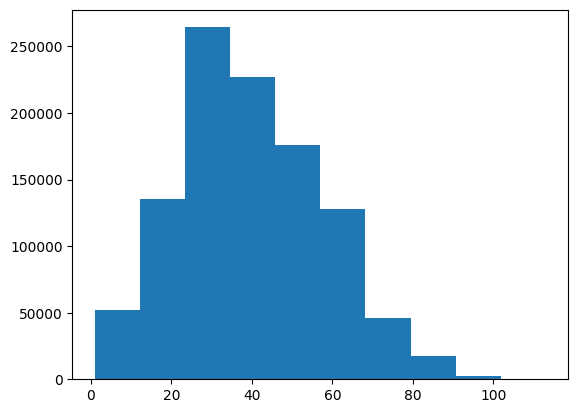

In [ ]:
plt.hist(covid19['Edad']); #Muestra un histograma de la variable Edad.

In [ ]:
covid19["Ubicación del caso"].value_counts() #Muestra la frecuencia de cada valor en la variable Ubicación del caso.

Ubicación del caso
Casa         1015144
Fallecido      28192
casa             890
CASA               5
Name: count, dtype: int64

In [ ]:
covid19["Estado"].value_counts() #Muestra la frecuencia de cada valor en la variable Estado.

Estado
Leve         1015641
Fallecido      28192
leve             398
Name: count, dtype: int64

In [ ]:
covid19["Nombre del país"].value_counts() # Muestra la frecuencia de cada valor en la variable Nombre del país.

Nombre del país
ESTADOS UNIDOS DE AMÉRICA               97
MÉXICO                                  33
BRASIL                                  16
ESPAÑA                                  16
VENEZUELA                               12
PANAMÁ                                  12
REPÚBLICA DOMINICANA                    11
CHILE                                    8
ECUADOR                                  7
EL SALVADOR                              7
PERÚ                                     5
PERU                                     2
ARMENIA                                  2
EMIRATOS ARABES UNIDOS                   2
PORTUGAL                                 2
FRANCIA                                  2
FEDERACIÓN DE RUSIA                      1
CANADÁ                                   1
ITALIA                                   1
EGIPTO                                   1
PUERTO RICO                              1
GUATEMALA                                1
CURAZAO                               

In [ ]:
# Muestra la frecuencia de cada valor en la variable Nombre del grupo étnico.
covid19["Nombre del grupo étnico"].value_counts()

Nombre del grupo étnico
Por definir         2117
Sin Comunidad       1922
ZENU                 686
KANKUAMO             453
PASTO                385
                    ... 
FUKUANAE               1
NUEVA ISLA             1
JARAIPA                1
ATANQUE                1
SAN ISIDRO No. 1       1
Name: count, Length: 1163, dtype: int64

In [ ]:
# con esta linea identificamos los datos unicos de la columna
covid19['Estado'].unique()

array(['Leve', 'Fallecido', nan, 'leve'], dtype=object)

In [ ]:
# Muestra los valores únicos de la variable Nombre departamento.
covid19['Nombre departamento'].unique()

array(['VALLE', 'ANTIOQUIA', 'SANTANDER', 'NORTE SANTANDER', 'CALDAS',
       'BOGOTA', 'CUNDINAMARCA', 'CAQUETA', 'QUINDIO', 'RISARALDA',
       'CASANARE', 'NARIÑO', 'HUILA', 'CESAR', 'META', 'STA MARTA D.E.',
       'TOLIMA', 'CAUCA', 'BARRANQUILLA', 'SUCRE', 'CARTAGENA', 'BOLIVAR',
       'GUAJIRA', 'ATLANTICO', 'CORDOBA', 'MAGDALENA', 'ARAUCA', 'BOYACA',
       'SAN ANDRES', 'CHOCO', 'GUAVIARE', 'VICHADA', 'PUTUMAYO', 'VAUPES',
       'GUAINIA', 'AMAZONAS', 'Caldas'], dtype=object)

## Insights

* Quitar datos nulos en las columnas "Ubicación del caso", "Estado", "Nombre del país", "Recuperado", "Tipo de recuperación", "Nombre del grupo étnico", "Código ISO del país".
* Datos duplicado en "Nombre del país".
* Agregar Formato de fecha a las siguiente columnas 'Fecha de inicio de síntomas', 'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación'.


## Limpieza de datos

In [ ]:
null_values_count = covid19.isna().sum() # Cuenta la cantidad de valores nulos en cada columna del DataFrame.
null_values_count

fecha reporte web                     0
ID de caso                            0
Fecha de notificación                 0
Código DIVIPOLA departamento          0
Nombre departamento                   0
Código DIVIPOLA municipio             0
Nombre municipio                      0
Edad                                  0
Unidad de medida de edad              0
Sexo                                  0
Tipo de contagio                      0
Ubicación del caso                 4344
Estado                             4344
Código ISO del país             1048325
Nombre del país                 1048325
Recuperado                         3595
Fecha de inicio de síntomas      105415
Fecha de muerte                 1016039
Fecha de diagnóstico                271
Fecha de recuperación             31787
Tipo de recuperación              31787
Pertenencia étnica                    0
Nombre del grupo étnico         1035151
dtype: int64

In [ ]:
total_registros = np.product(covid19.shape) # Calcula el número total de registros en el DataFrame.
total_nulos = null_values_count.sum() # Calcula el número total de valores nulos en el DataFrame.

(total_nulos/total_registros) * 100  # Muestra el porcentaje de valores nulos en el DataFrame.

17.95141439365433

In [ ]:
# Convierte todas las letras de la variable Ubicación del caso a minúsculas y la primera letra a mayúscula.
covid19["Ubicación del caso"] = covid19["Ubicación del caso"].str.lower().str.capitalize()

In [ ]:
# Reemplaza los valores nulos en la variable 'Ubicación del caso' por "No informado".
covid19["Ubicación del caso"].fillna("No informado", inplace=True)

In [ ]:
# Cuenta la cantidad de casos para cada ubicación y guarda el resultado en una variable.
ocurrencias_ubicacion = covid19["Ubicación del caso"].value_counts()
ocurrencias_ubicacion #Muestra la variable con las ocurrencias de cada ubicación.

Ubicación del caso
Casa            1016039
Fallecido         28192
No informado       4344
Name: count, dtype: int64

In [ ]:
# Convierte la primera letra de cada estado a mayúscula.
covid19["Estado"] = covid19["Estado"].str.capitalize()

In [ ]:
# Rellena los valores nulos en la columna "Estado" con el texto "No disponible".
covid19["Estado"].fillna("No disponible", inplace=True)

In [ ]:
# Cuenta la cantidad de casos para cada estado.
covid19["Estado"].value_counts()

Estado
Leve             1016039
Fallecido          28192
No disponible       4344
Name: count, dtype: int64

In [ ]:
# Rellena los valores nulos en la columna "Nombre del país" con el texto "Colombia".
covid19["Nombre del país"].fillna("Colombia", inplace=True)

In [ ]:
# Elimina espacios en blanco al inicio y al final de cada nombre de país.
covid19["Nombre del país"] = covid19["Nombre del país"].str.strip().str.capitalize()

In [ ]:
# Reemplaza nombres de países específicos con la forma correcta.
covid19["Nombre del país"].replace({"Estados unidos": "Estados unidos de américa", "Peru": "Perú"}, inplace=True)

In [ ]:
# Convierte la primera letra de cada valor en "Recuperado" a mayúscula.
covid19["Recuperado"] = covid19["Recuperado"].str.capitalize()

In [ ]:
# Rellena los valores nulos en la columna "Recuperado" con el texto "No registrado".
covid19["Recuperado"].fillna("No registrado", inplace=True)

In [ ]:
# Cuenta la cantidad de casos para cada estado de recuperación.
covid19["Recuperado"].value_counts()

Recuperado
Recuperado       1016788
Fallecido          28192
No registrado       3595
Name: count, dtype: int64

In [ ]:
# Rellena los valores nulos en la columna "Tipo de recuperación" con el texto "No disponible".
covid19["Tipo de recuperación"].fillna("No disponible", inplace=True)

In [ ]:
# Cuenta las ocurrencias de cada valor en "Tipo de recuperación" después de las modificaciones
covid19["Tipo de recuperación"].value_counts()

Tipo de recuperación
Tiempo           832442
PCR              184346
No disponible     31787
Name: count, dtype: int64

In [ ]:
# Reemplaza los valores nulos en la columna "Nombre del grupo étnico" por "Sin especificar"
covid19["Nombre del grupo étnico"].fillna("Sin especificar", inplace=True)

In [ ]:
# Convierte la primera letra de cada nombre de grupo étnico a mayúscula
covid19["Nombre del grupo étnico"] = covid19["Nombre del grupo étnico"].str.capitalize()

In [ ]:
# Cuenta las ocurrencias de cada nombre de grupo étnico después de las modificaciones
covid19["Nombre del grupo étnico"].value_counts()

Nombre del grupo étnico
Sin especificar                     1035151
Por definir                            2117
Sin comunidad                          1922
Zenu                                    686
Kankuamo                                453
                                     ...   
Apatalain ( zona wimpeshi)                1
Selva de mataven atana pirariami          1
Karekaremana                              1
Santa barbara                             1
San isidro no. 1                          1
Name: count, Length: 1161, dtype: int64

In [ ]:
# Reemplaza los valores nulos en la columna "Código ISO del país" por 170 indica el codigo de Colombia
covid19["Código ISO del país"].fillna(170, inplace=True)

In [ ]:
# Reemplaza los valores nulos en la columna "Fecha de inicio de síntomas" por una fecha predeterminada
covid19['Fecha de inicio de síntomas'].fillna(pd.to_datetime("2000-01-01 00:00:00"), inplace=True)

In [ ]:
# Se reemplazan los valores nulos en "Fecha de muerte" por la fecha "2000-01-01 00:00:00"
covid19['Fecha de muerte'].fillna(pd.to_datetime("2000-01-01 00:00:00"), inplace=True)

In [ ]:
# Se reemplazan los valores nulos en "Fecha de diagnóstico" por la fecha "2000-01-01 00:00:00"
covid19['Fecha de diagnóstico'].fillna(pd.to_datetime("2000-01-01 00:00:00"), inplace=True)

In [ ]:
# Se reemplazan los valores nulos en "Fecha de recuperación" por la fecha "2000-01-01 00:00:00"
covid19['Fecha de recuperación'].fillna(pd.to_datetime("2000-01-01 00:00:00"), inplace=True)

In [ ]:
# Se crea una nueva columna llamada "N_registros" que contiene un rango de números del 1 al número de filas del DataFrame
covid19['N_registros'] = range(1, len(covid19) + 1)

In [ ]:
# Se inserta la columna "N_registros" al inicio del DataFrame
covid19.insert(0, 'N_registros', covid19.pop('N_registros'))

In [ ]:
# Se cuenta el número de valores nulos en cada columna del DataFrame
null_values_count = covid19.isna().sum()
# Se muestra el resultado
null_values_count

N_registros                     0
fecha reporte web               0
ID de caso                      0
Fecha de notificación           0
Código DIVIPOLA departamento    0
Nombre departamento             0
Código DIVIPOLA municipio       0
Nombre municipio                0
Edad                            0
Unidad de medida de edad        0
Sexo                            0
Tipo de contagio                0
Ubicación del caso              0
Estado                          0
Código ISO del país             0
Nombre del país                 0
Recuperado                      0
Fecha de inicio de síntomas     0
Fecha de muerte                 0
Fecha de diagnóstico            0
Fecha de recuperación           0
Tipo de recuperación            0
Pertenencia étnica              0
Nombre del grupo étnico         0
dtype: int64

In [ ]:
# Se exporta el DataFrame a un archivo CSV llamado "covid19_datos.csv"
covid19.to_csv('covid19_datos.csv', index=False)